<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DATA" data-toc-modified-id="DATA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Target</a></span></li></ul></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Product-price" data-toc-modified-id="Product-price-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Product price</a></span><ul class="toc-item"><li><span><a href="#Merge-price-column-to-df" data-toc-modified-id="Merge-price-column-to-df-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Merge price column to df</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li><li><span><a href="#Dealing-with-NaNs" data-toc-modified-id="Dealing-with-NaNs-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Dealing with NaNs</a></span></li></ul></li></ul></div>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import os

## DATA

### Dataset

In [24]:
data_root="../data/"
datafile=os.path.join(data_root,'dfjoin_usertype_Scount_daysSLS_landing_campaign_srceMed_city_device_OS_2019_2020_jan21.csv')
df=pd.read_csv(datafile)
print(df.shape)
df.head(3)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(3654882, 18)


,Unnamed: 0,ga:productSKU,ga:dateHourMinute,ga:pagePath,ga:pageDepth,ga:userType,ga:sessionCount,ga:daysSinceLastSession,ga:landingPagePath,ga:campaign,ga:sourceMedium,ga:city,ga:deviceCategory,ga:operatingSystem,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,0,1008,201904301452,/parafarmacia/es/,1,New Visitor,1,0,/parafarmacia/es/,(not set),(direct) / (none),Burgos,mobile,iOS,1,0,0,0
1,1,1008,201904301524,/parafarmacia/es/,3,New Visitor,1,0,/parafarmacia/es/,(not set),(direct) / (none),Madrid,desktop,Windows,1,0,0,0
2,2,1008,201904301545,/parafarmacia/es/,7,Returning Visitor,33,0,/parafarmacia/es/,(not set),merchants.google.com / referral,Zamudio,desktop,Windows,1,0,0,0


In [25]:
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
print("")
df.info()

(3654882, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654882 entries, 0 to 3654881
Data columns (total 17 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ga:productSKU            object
 1   ga:dateHourMinute        int64 
 2   ga:pagePath              object
 3   ga:pageDepth             int64 
 4   ga:userType              object
 5   ga:sessionCount          int64 
 6   ga:daysSinceLastSession  int64 
 7   ga:landingPagePath       object
 8   ga:campaign              object
 9   ga:sourceMedium          object
 10  ga:city                  object
 11  ga:deviceCategory        object
 12  ga:operatingSystem       object
 13  ga:productListViews      int64 
 14  ga:productListClicks     int64 
 15  ga:productDetailViews    int64 
 16  ga:productAddsToCart     int64 
dtypes: int64(8), object(9)
memory usage: 474.0+ MB


### Target

In [26]:
df['ga:productAddsToCart_transf']=df["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)

print("No. observations per class")
print(df['ga:productAddsToCart_transf'].value_counts())
print("")

print("% observations per class")
print(100*df['ga:productAddsToCart_transf'].value_counts(normalize=True))

No. observations per class
0    3586668
1      68214
Name: ga:productAddsToCart_transf, dtype: int64

% observations per class
0    98.13362
1     1.86638
Name: ga:productAddsToCart_transf, dtype: float64


## Functions

## Product price

### Merge price column to df

In [27]:
# Product Catalog dataset
prod_datafile=os.path.join(data_root,'product_2021-02-09_103558.csv')
prod_info=pd.read_csv(prod_datafile,sep=";")
prod_info.head(5)

,Product ID,Imagen,Nombre,Referencia,Categoría,Precio (imp. excl.),Precio (imp. incl.),Cantidad,Estado,Posición
0,7878,https://www.galileo61.com/6882/my-organics-70-...,My organics 7.0 Rubio / Blonde,NaN,Novedades,12.314050,14.9,50.0,0,NaN
1,7877,https://www.galileo61.com/6881/my-organics-80-...,My Organics 8.0 Rubio Claro / Light Blonde,NaN,Baño e higiene personal,12.314050,14.9,50.0,0,NaN
2,7876,https://www.galileo61.com/6880/aceite-corporal...,Aceite corporal quemagrasas tacto seco Fat bur...,NaN,Reafirmantes.,61.983471,75.0,40.0,0,NaN
3,7875,https://www.galileo61.com/6879/aceite-anticelu...,Aceite anticelulítico tacto seco: Slimming Oil...,NaN,Inicio,74.380165,90.0,40.0,0,NaN
4,7874,https://www.galileo61.com/6878/aceite-reafirma...,Aceite reafirmante tacto seco Firming Oil 50ml...,NaN,Reafirmantes.,57.851240,70.0,40.0,0,NaN


In [28]:
prod_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           3899 non-null   int64  
 1   Imagen               3899 non-null   object 
 2   Nombre               3898 non-null   object 
 3   Referencia           3386 non-null   object 
 4   Categoría            3660 non-null   object 
 5   Precio (imp. excl.)  3899 non-null   float64
 6   Precio (imp. incl.)  3899 non-null   float64
 7   Cantidad             3898 non-null   float64
 8   Estado               3899 non-null   int64  
 9   Posición             0 non-null      float64
dtypes: float64(4), int64(2), object(4)
memory usage: 304.7+ KB


In [29]:
prod_price_info=prod_info[['Product ID','Precio (imp. incl.)']]
prod_price_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           3899 non-null   int64  
 1   Precio (imp. incl.)  3899 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 61.0 KB


In [30]:
df['ga:productSKU']= df['ga:productSKU'].astype('str')
prod_price_info['Product ID']=prod_price_info['Product ID'].astype('str')
df = df.merge(prod_price_info,left_on='ga:productSKU', right_on='Product ID',how='left')
df.drop('Product ID',axis=1,inplace=True)
df.info()

<ipython-input-30-53f9f9fa6b5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_price_info['Product ID']=prod_price_info['Product ID'].astype('str')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654882 entries, 0 to 3654881
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ga:productSKU                object 
 1   ga:dateHourMinute            int64  
 2   ga:pagePath                  object 
 3   ga:pageDepth                 int64  
 4   ga:userType                  object 
 5   ga:sessionCount              int64  
 6   ga:daysSinceLastSession      int64  
 7   ga:landingPagePath           object 
 8   ga:campaign                  object 
 9   ga:sourceMedium              object 
 10  ga:city                      object 
 11  ga:deviceCategory            object 
 12  ga:operatingSystem           object 
 13  ga:productListViews          int64  
 14  ga:productListClicks         int64  
 15  ga:productDetailViews        int64  
 16  ga:productAddsToCart         int64  
 17  ga:productAddsToCart_transf  int64  
 18  Precio (imp. incl.)          float64
dtype

In [31]:
df.rename(columns={"Precio (imp. incl.)": "Product_price"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654882 entries, 0 to 3654881
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ga:productSKU                object 
 1   ga:dateHourMinute            int64  
 2   ga:pagePath                  object 
 3   ga:pageDepth                 int64  
 4   ga:userType                  object 
 5   ga:sessionCount              int64  
 6   ga:daysSinceLastSession      int64  
 7   ga:landingPagePath           object 
 8   ga:campaign                  object 
 9   ga:sourceMedium              object 
 10  ga:city                      object 
 11  ga:deviceCategory            object 
 12  ga:operatingSystem           object 
 13  ga:productListViews          int64  
 14  ga:productListClicks         int64  
 15  ga:productDetailViews        int64  
 16  ga:productAddsToCart         int64  
 17  ga:productAddsToCart_transf  int64  
 18  Product_price                float64
dtype

### Exploratory Analysis

In [32]:
df['Product_price'].describe()

count    3.344233e+06
mean     3.496070e+01
std      3.450897e+01
min      0.000000e+00
25%      1.150000e+01
50%      2.765000e+01
75%      4.500000e+01
max      2.834000e+02
Name: Product_price, dtype: float64

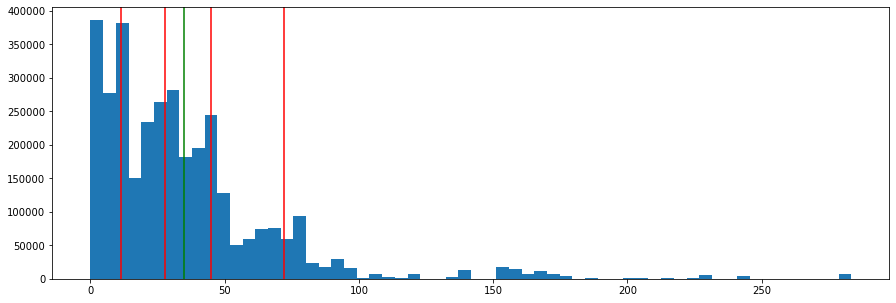

In [33]:
plt.figure(figsize=(15,5))
plt.hist(df['Product_price'],bins=60)
plt.axvline(x=np.mean(df['Product_price']), c= "green")
plt.axvline(x=np.nanpercentile(df['Product_price'],25), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],50), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],75), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],90), c= "red")
plt.show();

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


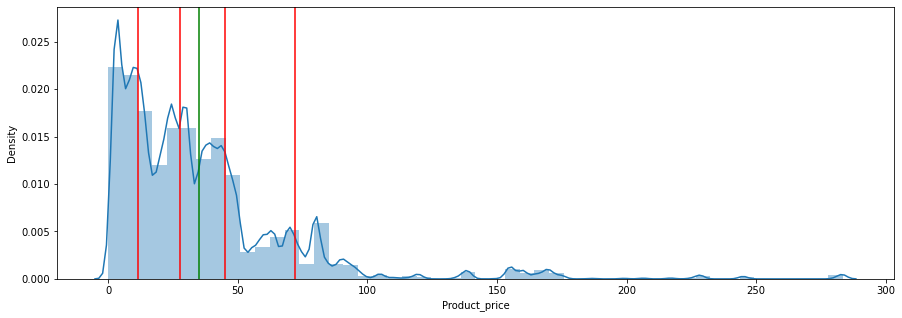

In [34]:
plt.figure(figsize=(15,5))
sns.distplot(df['Product_price'].dropna().astype(float))
plt.axvline(x=np.mean(df['Product_price']), c= "green")
plt.axvline(x=np.nanpercentile(df['Product_price'],25), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],50), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],75), c= "red")
plt.axvline(x=np.nanpercentile(df['Product_price'],90), c= "red")
plt.show();

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='Product_price'>

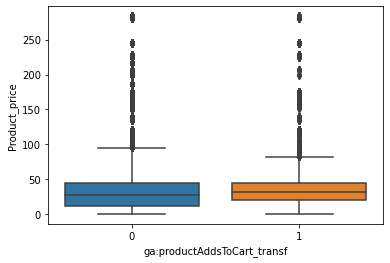

In [35]:
sns.boxplot(data=df,x=df['ga:productAddsToCart_transf'],y=df['Product_price'])

<AxesSubplot:xlabel='ga:productAddsToCart_transf', ylabel='Product_price'>

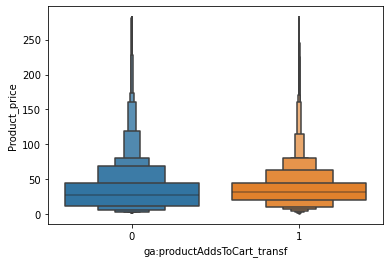

In [36]:
sns.boxenplot(data=df,x=df['ga:productAddsToCart_transf'],y=df['Product_price'])

In [37]:
df[df["ga:productAddsToCart_transf"]==1]['Product_price'].describe()

count    62555.000000
mean        36.573690
std         26.949414
min          0.000000
25%         19.950000
50%         31.900000
75%         44.900000
max        283.400000
Name: Product_price, dtype: float64

In [38]:
df[df["ga:productAddsToCart_transf"]==0]['Product_price'].describe()

count    3.281678e+06
mean     3.492996e+01
std      3.463632e+01
min      0.000000e+00
25%      1.111000e+01
50%      2.700000e+01
75%      4.500000e+01
max      2.834000e+02
Name: Product_price, dtype: float64

Veamos si efectivamente las medianas son significativamente diferentes. Para ello, aplicaremos el test Mam Withney U que establece como Ho que ambas medianas son iguales. 

He escogido este test frente a Wilcoxon Test por la diferencia en la dispersión de los datos que se ha señalado anteriormente. Mientras que Wilcoxon requiere que las 2 desviaciones tipocas sean igual, Mam Whitney no. (CONSULTAR PROFE - no se como interpretar en este caso muestras relacionadas o independientes).

In [39]:
stats.mannwhitneyu(df[df['ga:productAddsToCart_transf']==1]['Product_price'], df[df['ga:productAddsToCart_transf']==0]['Product_price'])

MannwhitneyuResult(statistic=110697441680.5, pvalue=0.0)

P-value es menor a 5%. Rechazamos Ho y podemos afirmar que las medianas de ambas distribuciones son diferentes y por lo tanto existen diferencias significativas entre ambas. 

### Dealing with NaNs

In [40]:
df.shape

(3654882, 19)

In [41]:
df[df['Product_price'].isna()].shape

(310649, 19)

In [42]:
na_rows = df[df['Product_price'].isna()]
na_rows['ga:productSKU'].nunique()

1800

In [43]:
na_rows['ga:productSKU'].value_counts()

1113    34568
1009    29629
973     28052
1159    27980
1161    13464
        ...  
3830        1
3568        1
1556        1
2731        1
2209        1
Name: ga:productSKU, Length: 1800, dtype: int64

Lo ideal a la hora de imputar los NaNs sería calcular el precio medio (o mediana) para cada una de las categorías a las que pertenece cada producto. Es previsible que el rango de precios no sea el mismo para una crema que para unas tiritas. 

De momento no contamos con ese dato, asi que optaremos por imputar la mediana global, para contrarrestar el sesgo que produce la larga cola que se aprecia en el histograma y el boxplot.

ACLARACION: La columna 'Categoría' del Catalogo de productos de Prestashop que hemos utilizado para importar los precios, no corresponde a la categoría del producto propiamente dicha sino a la página a la que se encuentra anidada el producto en la web en el momento en el que se descargó el catalógo. 

In [44]:
df['Product_price'].fillna(df['Product_price'].median(),inplace=True)
df['Product_price'].isna().any()

False